Importing plotly failed. Interactive plots will not work.
C:\Users\rumeysagokce\AppData\Local\Temp\ipykernel_2872\1253007330.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.381004  40.390383  39.677748  39.888727  102223600
2018-01-03  40.373970  40.917824  40.310679  40.444296  118071600
2018-01-04  40.561493  40.664638  40.338796  40.446626   89738400
2018-01-05  41.023300  41.110034  40.566184  40.657607   94640000
2018-01-08  40.870937  41.166304  40.772478  40.870937   82271200


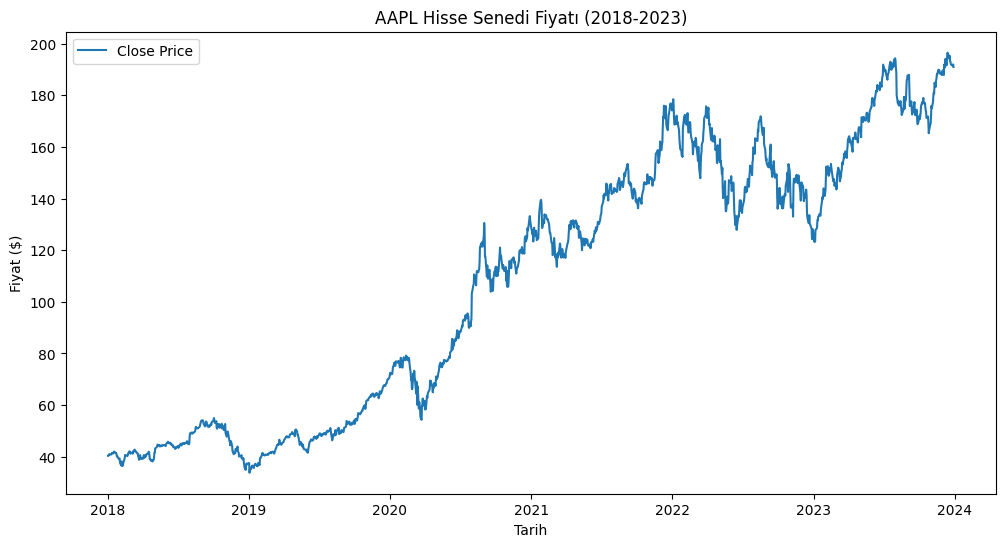

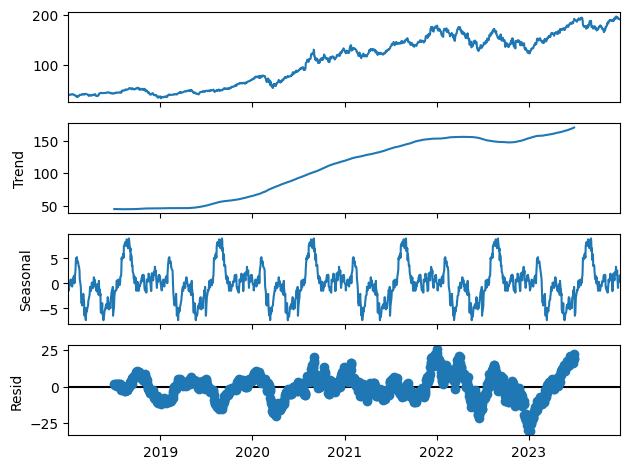

In [3]:
# 1. Gerekli kütüphaneler
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 2. Veri çekme
df = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
print(df.head())

# 3. Kapanış fiyatlarını çizdirme
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('AAPL Hisse Senedi Fiyatı (2018-2023)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat ($)')
plt.legend()
plt.show()

# 4. Trend ve mevsimsellik analizi
result = seasonal_decompose(df['Close'], model='additive', period=252)
result.plot()
plt.show()


21:57:08 - cmdstanpy - INFO - Chain [1] start processing
21:57:09 - cmdstanpy - INFO - Chain [1] done processing


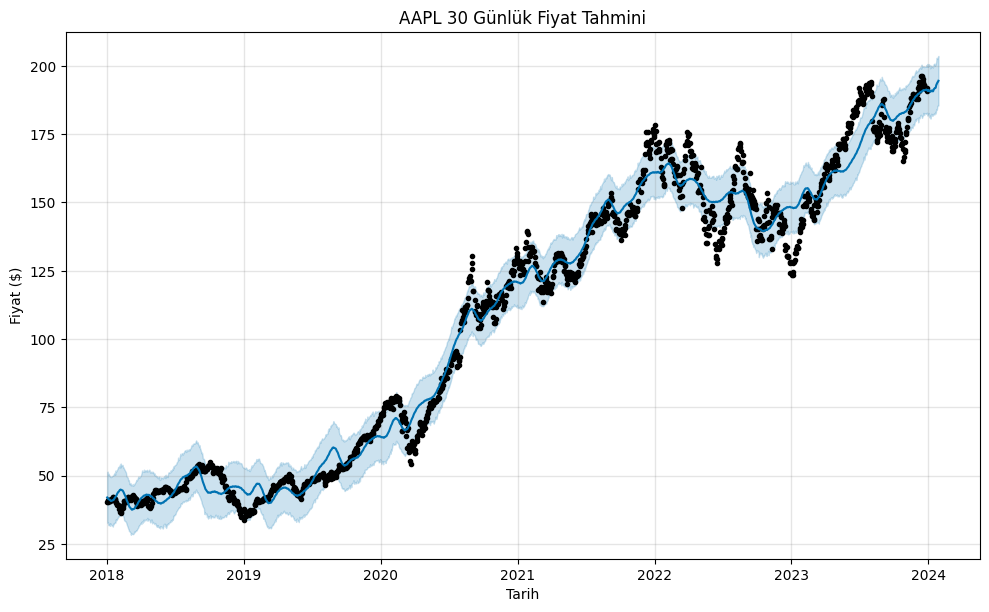

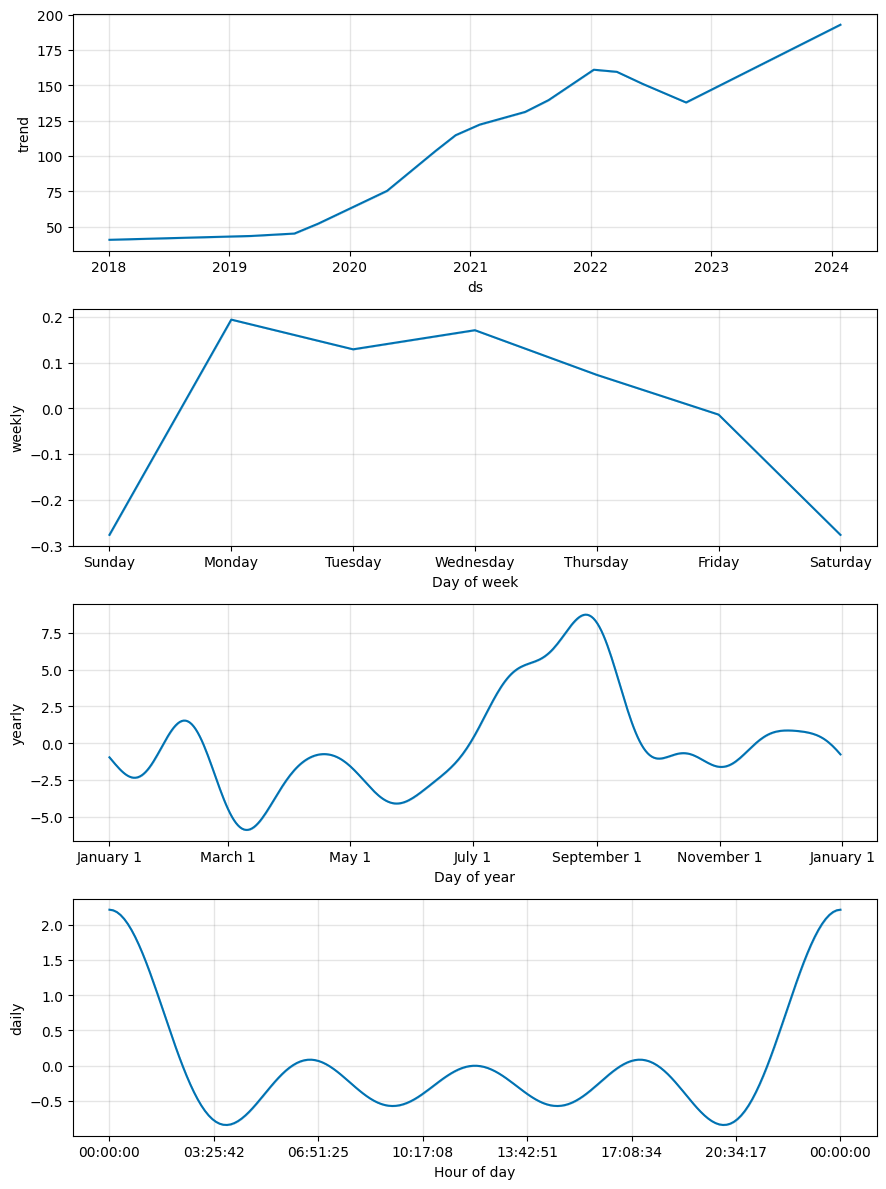

In [ ]:
# 5. Prophet veri formatına dönüştürme
df_prophet=df.reset_index()[['Date', 'Close']]
df_prophet.columns=['ds','y']

# 6. Modeli oluşturma ve eğitme
model=Prophet(daily_seasonality=True)
model.fit(df_prophet)

# 7. Gelecek 30 gün için tahmin
future=model.make_future_dataframe(periods=30)
forecast=model.predict(future)

# 8. Tahmin grafiği
model.plot(forecast)
plt.title("AAPL 30 Günlük Fiyat Tahmini")
plt.xlabel("Tarih") 
plt.ylabel("Fiyat ($)")
plt.show()

# 9. Bileşen analizi
model.plot_components(forecast)
plt.show()


# future: 30 günlük ileri tarihleri içeren DataFrame
# forecast: Tahmin sonuçları (yhat ortalama tahmin, yhat_lower, yhat_upper güven aralıkları)
# plot_components: Trend, haftalık ve yıllık etkileri ayrı grafikte gösterir

In [ ]:
# 10. Gerçek ve tahmin edilen değerleri karşılaştırma
y_true=df_prophet['y'] # Gerçek kapanış fiyatları
y_pred=forecast['yhat'][:len(y_true)]  # Tahmin edilen kapanış fiyatları

# 11. Metriklerin hesaplanmas
mae=mean_absolute_error(y_true,y_pred)
rmse=np.sqrt(mean_squared_error(y_true,y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# MAE → Tahmin ile gerçek değer arasındaki mutlak hata ortalaması
# (Hata küçükse tahminler daha doğru)

# RMSE → Hataların karelerinin ortalamasının karekökü
# (Büyük hataları daha çok cezalandırır)

Mean Absolute Error (MAE): 5.46
Root Mean Squared Error (RMSE): 7.04
